![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Start coding here...

In [2]:
Sales_Data=brands.merge(finance, on='product_id') \
          .merge(info, on='product_id') \
          .merge(reviews, on='product_id')
Sales_Data.head()

,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews
0,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G27341,Adidas,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0
2,CM0081,Adidas,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0
3,B44832,Adidas,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0
4,D98205,Adidas,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0


In [3]:
Sales_Data.shape

(3179, 10)

In [4]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   brand          3120 non-null   object 
 2   listing_price  3120 non-null   float64
 3   sale_price     3120 non-null   float64
 4   discount       3120 non-null   float64
 5   revenue        3120 non-null   float64
 6   product_name   3120 non-null   object 
 7   description    3117 non-null   object 
 8   rating         3120 non-null   float64
 9   reviews        3120 non-null   float64
dtypes: float64(6), object(4)
memory usage: 273.2+ KB


In [5]:
Sales_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_price,3120.0,69.719455,46.586909,0.00,45.99,59.99,89.990,299.99
sale_price,3120.0,60.103035,41.906852,4.49,29.99,45.99,77.990,365.00
discount,3120.0,0.276090,0.224955,0.00,0.00,0.40,0.500,0.60
revenue,3120.0,3951.571263,4440.312551,0.00,863.89,2735.28,5345.015,64203.93
rating,3120.0,3.265801,1.392685,0.00,2.60,3.50,4.400,5.00
reviews,3120.0,41.545513,31.361668,0.00,12.00,39.00,69.000,223.00


In [6]:
Sales_Data.describe(include='object').T

,count,unique,top,freq
product_id,3179,3179,AH2430,1
brand,3120,2,Adidas,2575
product_name,3120,1511,Men's adidas Originals Supercourt Shoes,16
description,3117,1740,A well cushioned shoe with a fresher look that...,15


In [7]:
# no. of unique values in the data frame
Sales_Data.nunique() 

product_id       3179
brand               2
listing_price      78
sale_price        226
discount            6
revenue          2202
product_name     1511
description      1740
rating             32
reviews           102
dtype: int64

In [8]:
# no. of duplicated rows
Sales_Data.duplicated().sum() 

0

In [9]:
# % of missing values
round((Sales_Data.isnull().sum()/len(Sales_Data)*100),3) 

product_id       0.000
brand            1.856
listing_price    1.856
sale_price       1.856
discount         1.856
revenue          1.856
product_name     1.856
description      1.950
rating           1.856
reviews          1.856
dtype: float64

In [10]:
Sales_Data.columns

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews'],
      dtype='object')

In [11]:
Sales_Data[Sales_Data[['brand']].isnull()]

,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Filter out rows with null values in multiple columns
Sales_Data[Sales_Data[['brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews']].notnull().all(axis=1)]


,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews
1,G27341,Adidas,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0
2,CM0081,Adidas,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0
3,B44832,Adidas,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0
4,D98205,Adidas,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0
5,B75586,Adidas,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0
...,...,...,...,...,...,...,...,...,...,...
3174,AT6100-606,Nike,0.00,64.95,0.0,0.00,Nike Tiempo Legend 8 Academy TF,The Nike Tiempo Legend 8 Academy TF takes the ...,0.0,0.0
3175,CT9155-063,Nike,0.00,139.95,0.0,251.91,Nike React Metcon AMP,The Nike React Metcon AMP takes the stability ...,3.0,1.0
3176,CI1236-100,Nike,159.95,127.97,0.0,230.35,Air Jordan 8 Retro,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1.0
3177,AH6799-300,Nike,0.00,169.95,0.0,1223.64,Nike Air Max 98,The Nike Air Max 98 features the OG design lin...,4.0,4.0


In [13]:
Sales_Data.dropna(how='any',inplace=True)

In [14]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(Sales_Data.index)/3179)),2)  #3179 is the actual dataframe rows.


0.02

In [15]:
# Rechecking % of missing values
round((Sales_Data.isnull().sum()/len(Sales_Data)*100),3) 

product_id       0.0
brand            0.0
listing_price    0.0
sale_price       0.0
discount         0.0
revenue          0.0
product_name     0.0
description      0.0
rating           0.0
reviews          0.0
dtype: float64

In [26]:
cat_cols=Sales_Data.select_dtypes(include=['object']).columns
num_cols = Sales_Data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['product_id', 'brand', 'product_name', 'description'], dtype='object')
Numerical Variables:
['listing_price', 'sale_price', 'discount', 'revenue', 'rating', 'reviews']


listing_price
Skew : 0.84
Variance : 2167.75


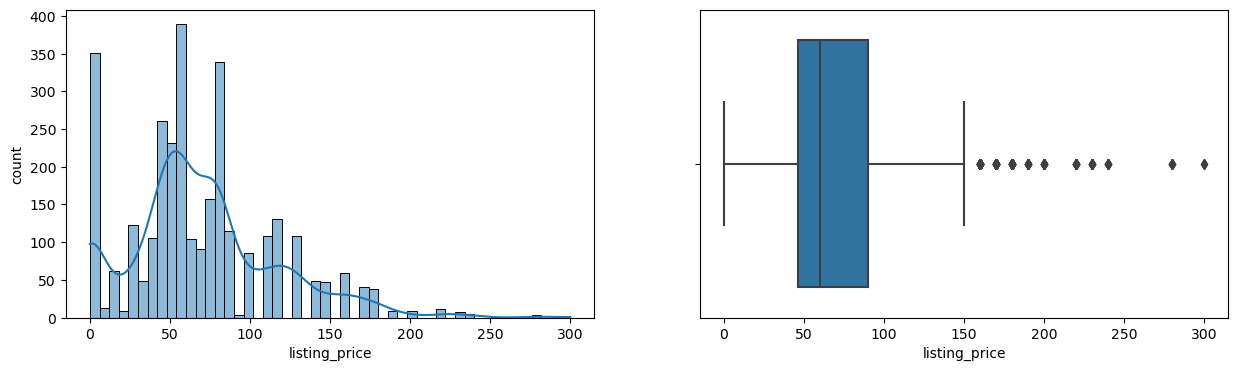

sale_price
Skew : 1.7
Variance : 1753.27


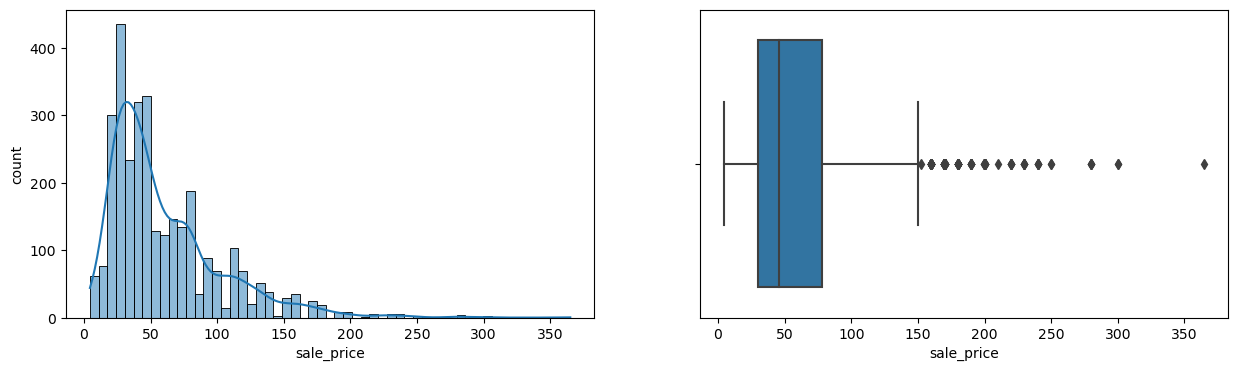

discount
Skew : -0.3
Variance : 0.05


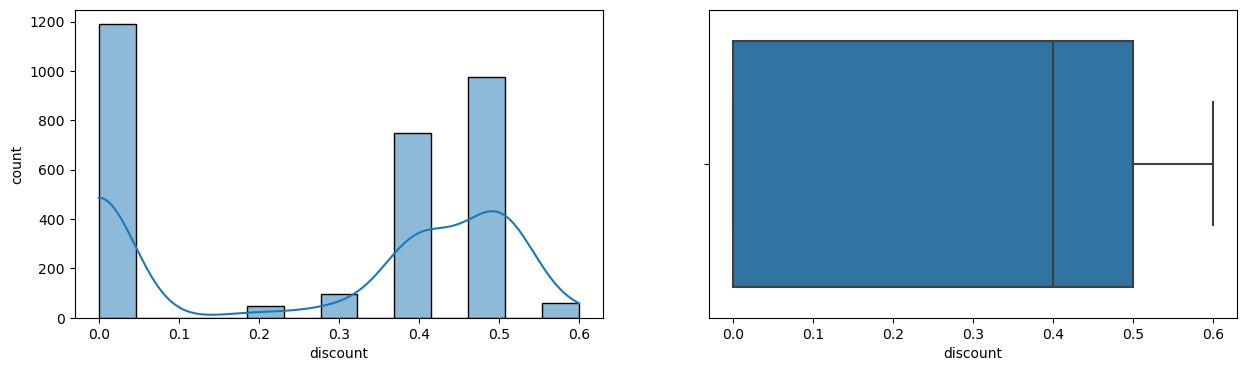

revenue
Skew : 2.9
Variance : 19673668.18


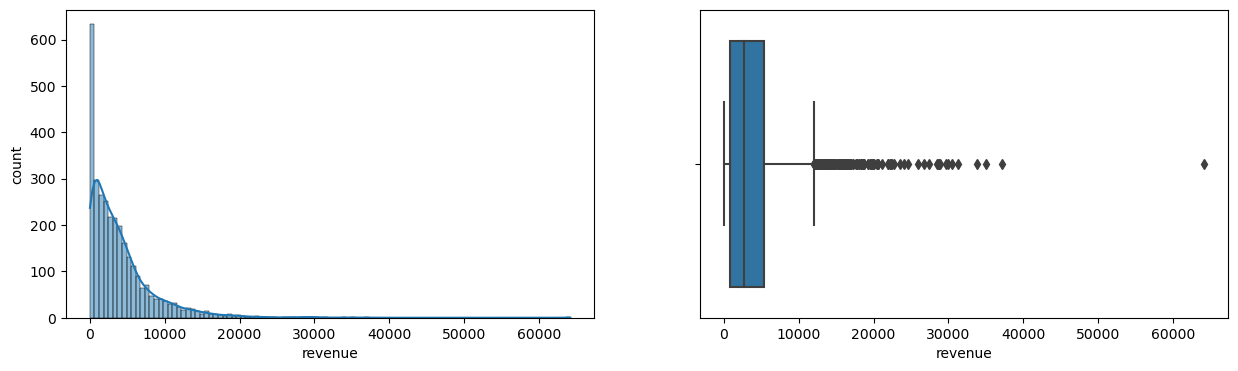

rating
Skew : -0.94
Variance : 1.94


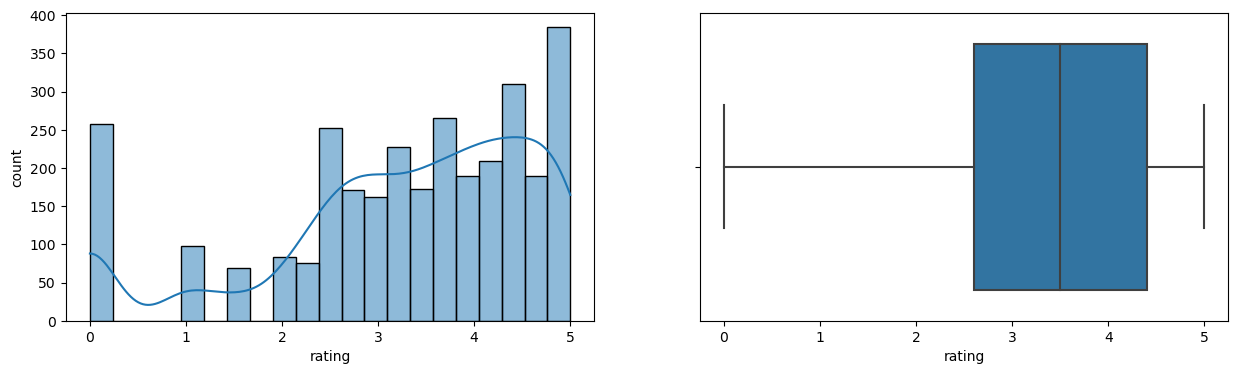

reviews
Skew : 0.27
Variance : 983.84


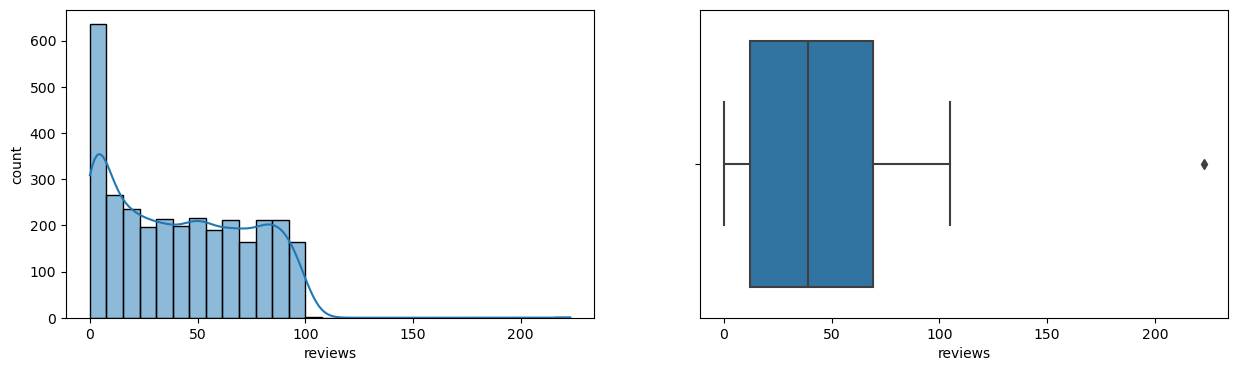

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(Sales_Data[col].skew(), 2))
    print('Variance :', round(Sales_Data[col].var(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=Sales_Data[col],kde= True) 
#   df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Sales_Data[col])
    plt.show()

In [27]:
cat_cols= cat_cols[1:-1]
cat_cols

Index(['brand', 'product_name'], dtype='object')

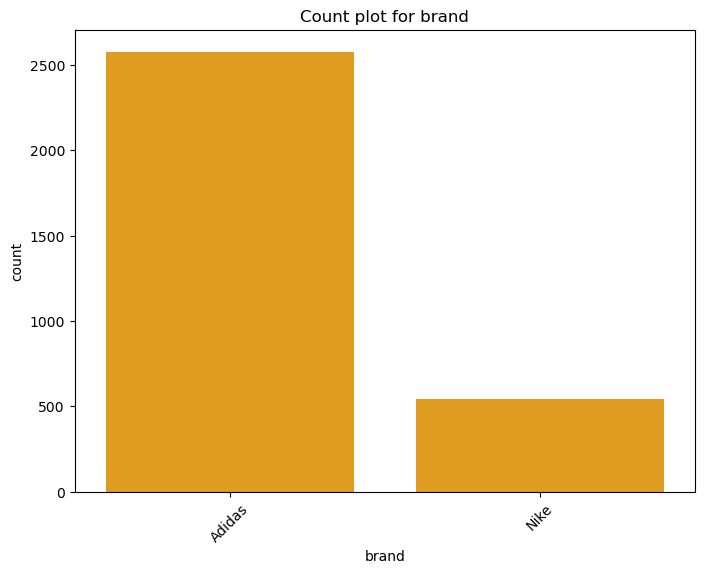

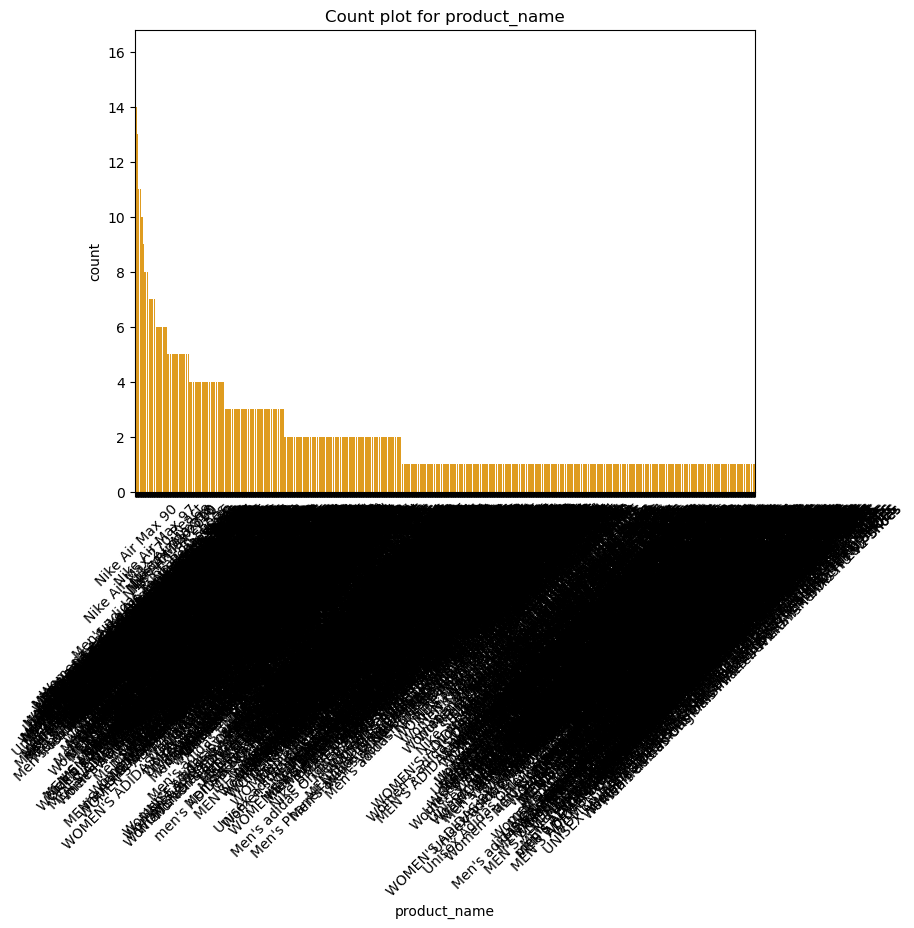

In [28]:

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x=col, data=Sales_Data, color='orange', order=Sales_Data[col].value_counts().index)
    ax.set_title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()


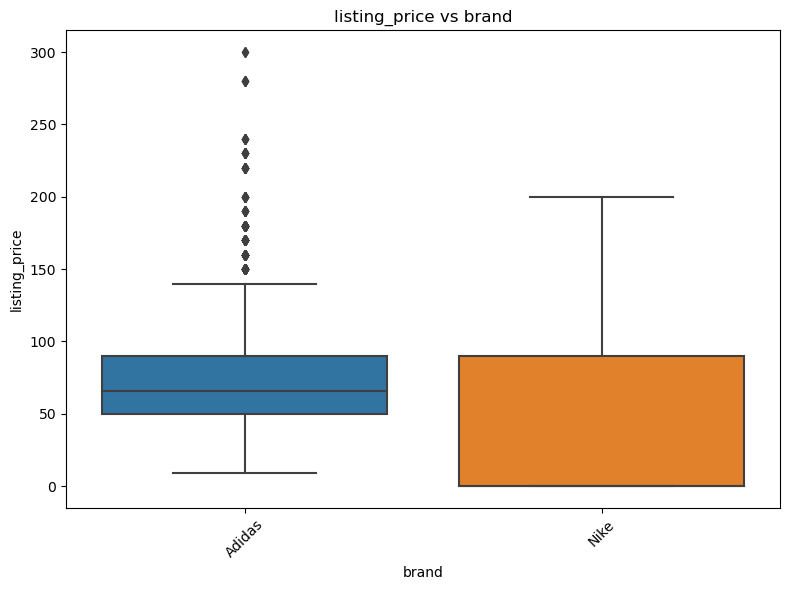

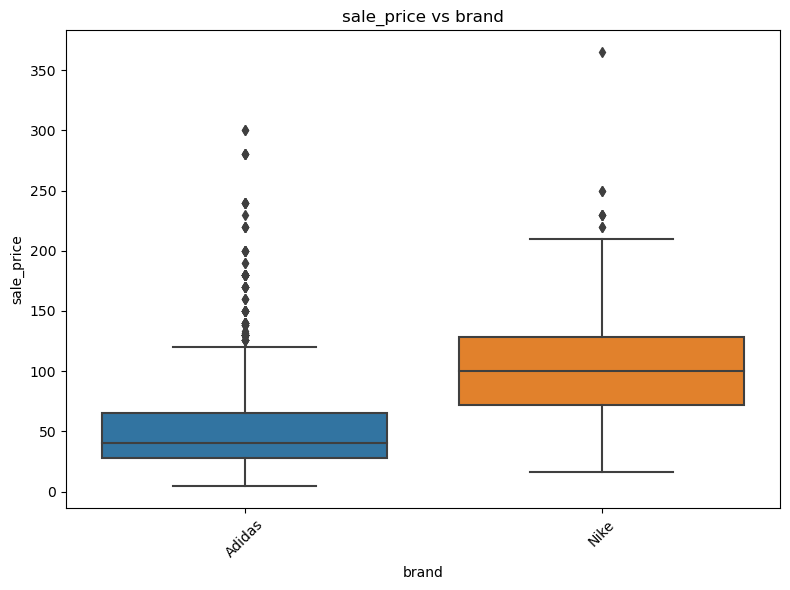

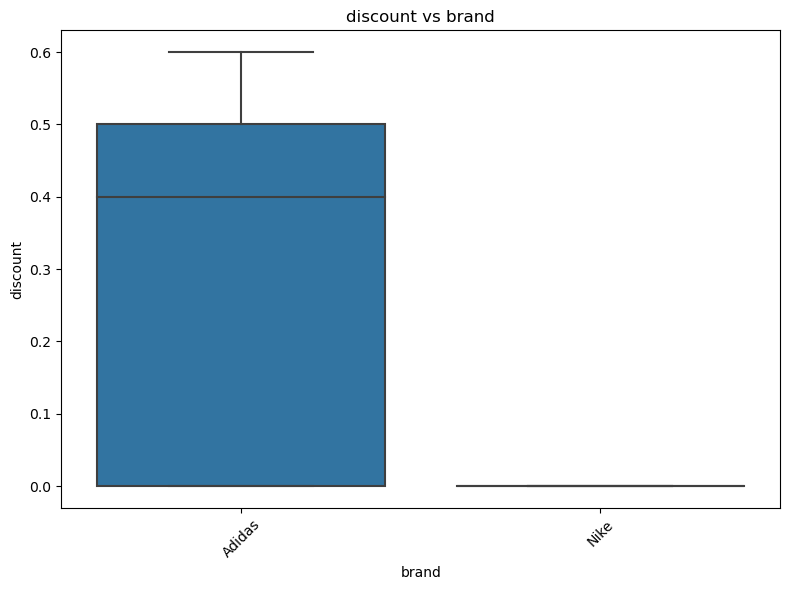

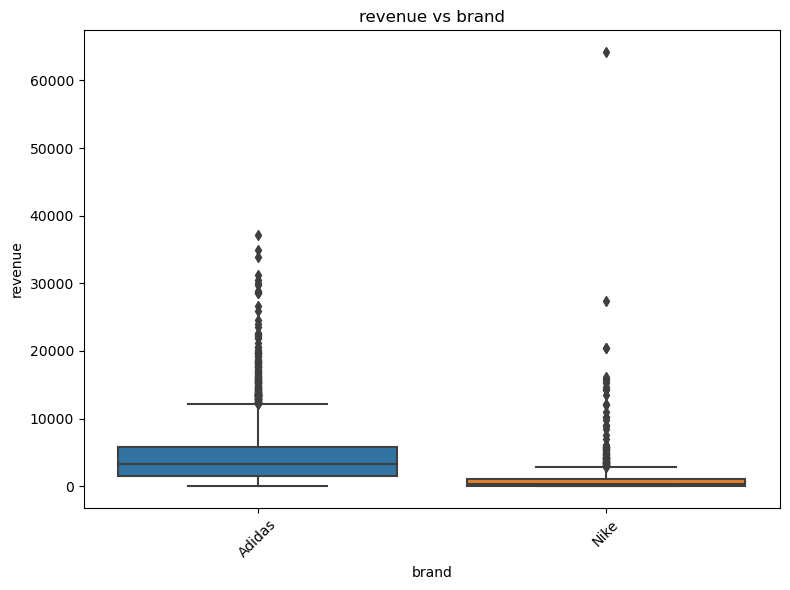

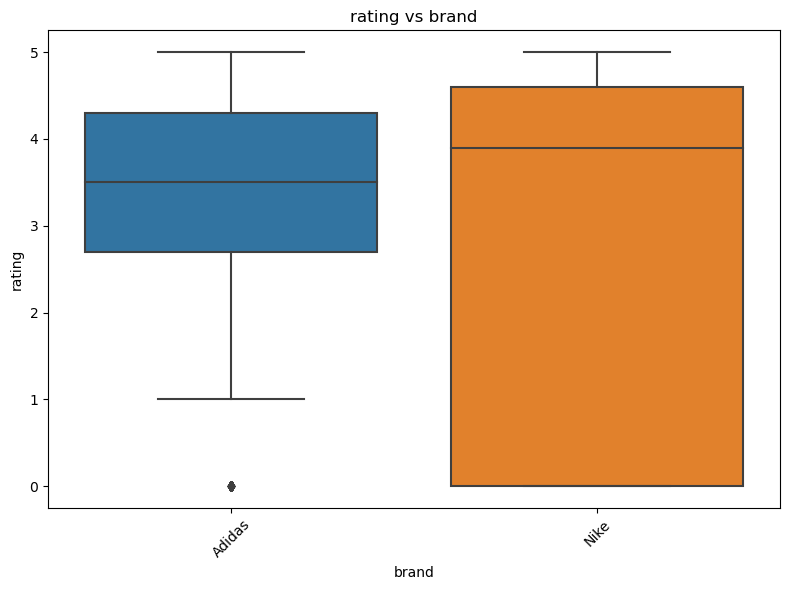

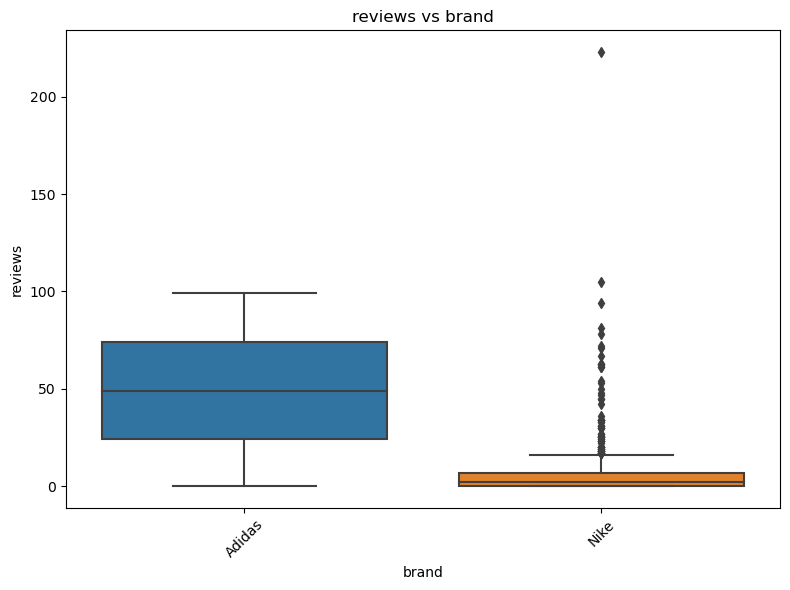

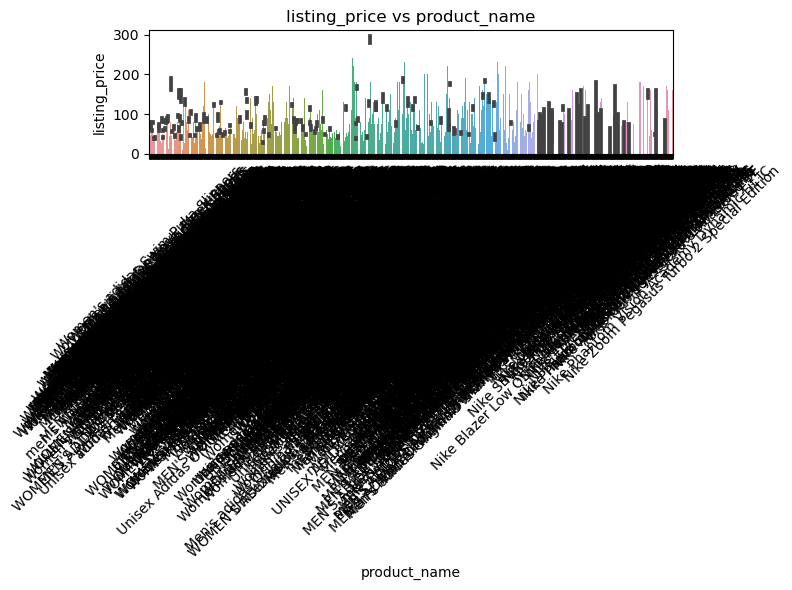

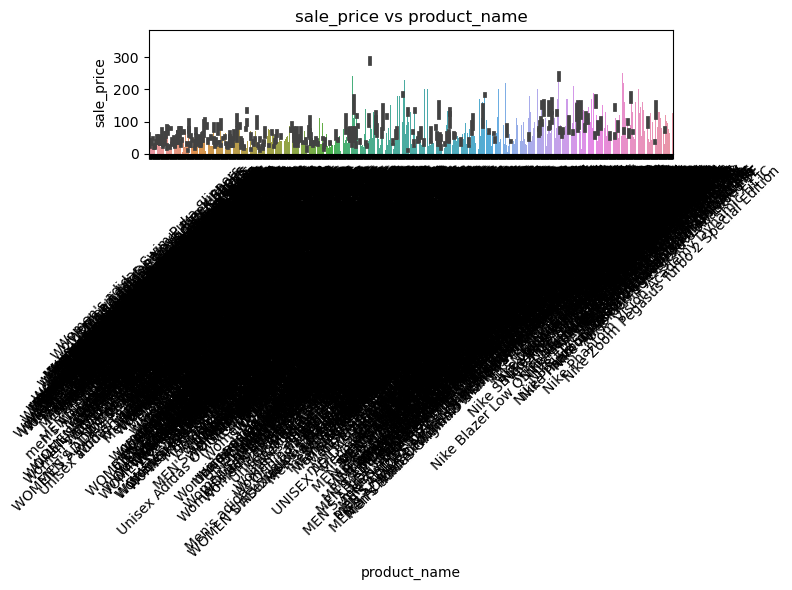

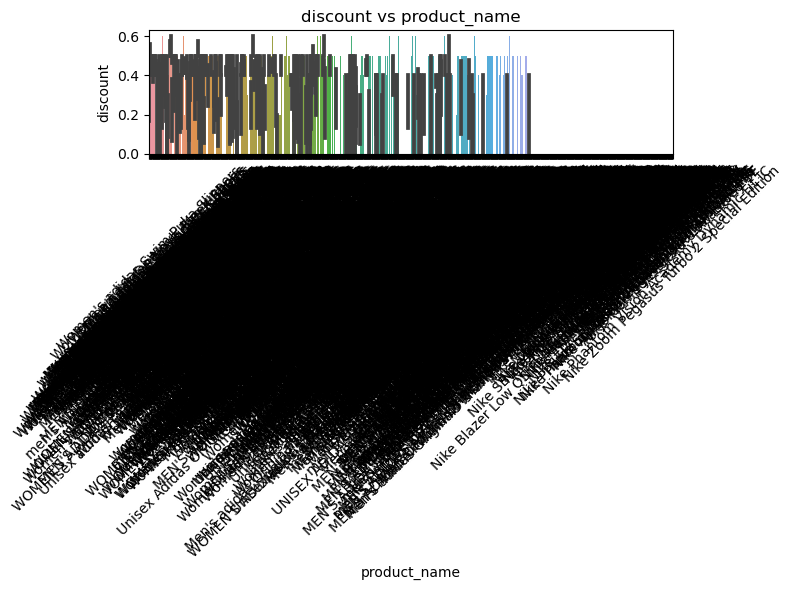

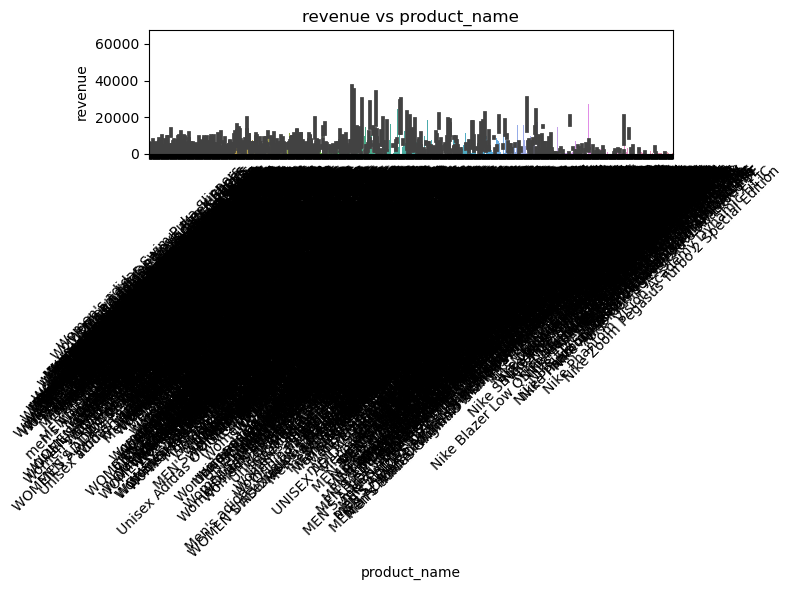

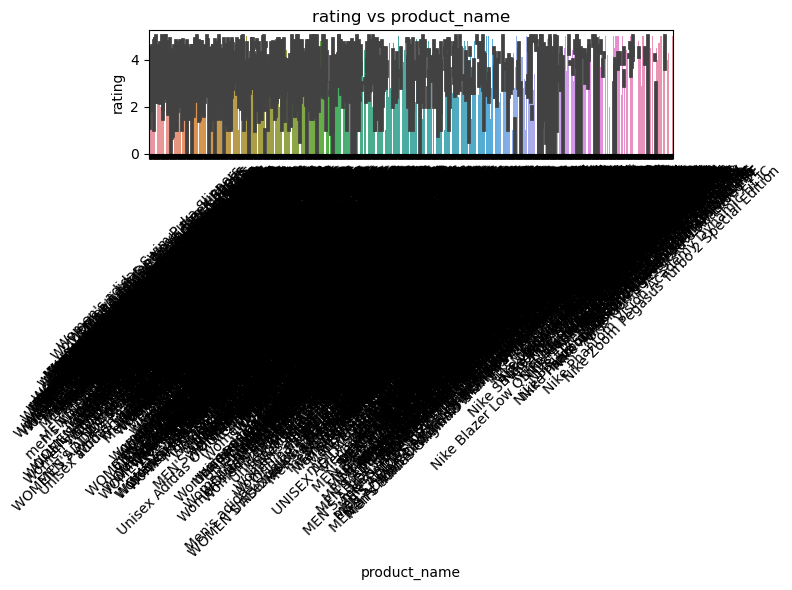

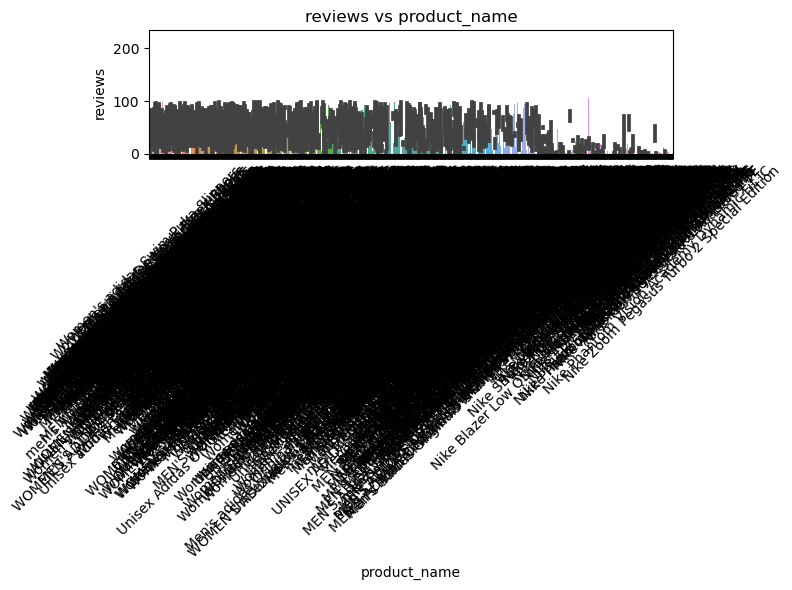

In [29]:
# Assuming cat_cols contains the names of categorical columns
# and num_cols contains the names of numerical columns
for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(8, 6))
        if len(Sales_Data[cat_col].unique()) <= 5:
            sns.boxplot(x=cat_col, y=num_col, data=Sales_Data)
        else:
            sns.barplot(x=cat_col, y=num_col, data=Sales_Data)  # Choose appropriate estimator
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

<Figure size 3000x2000 with 0 Axes>

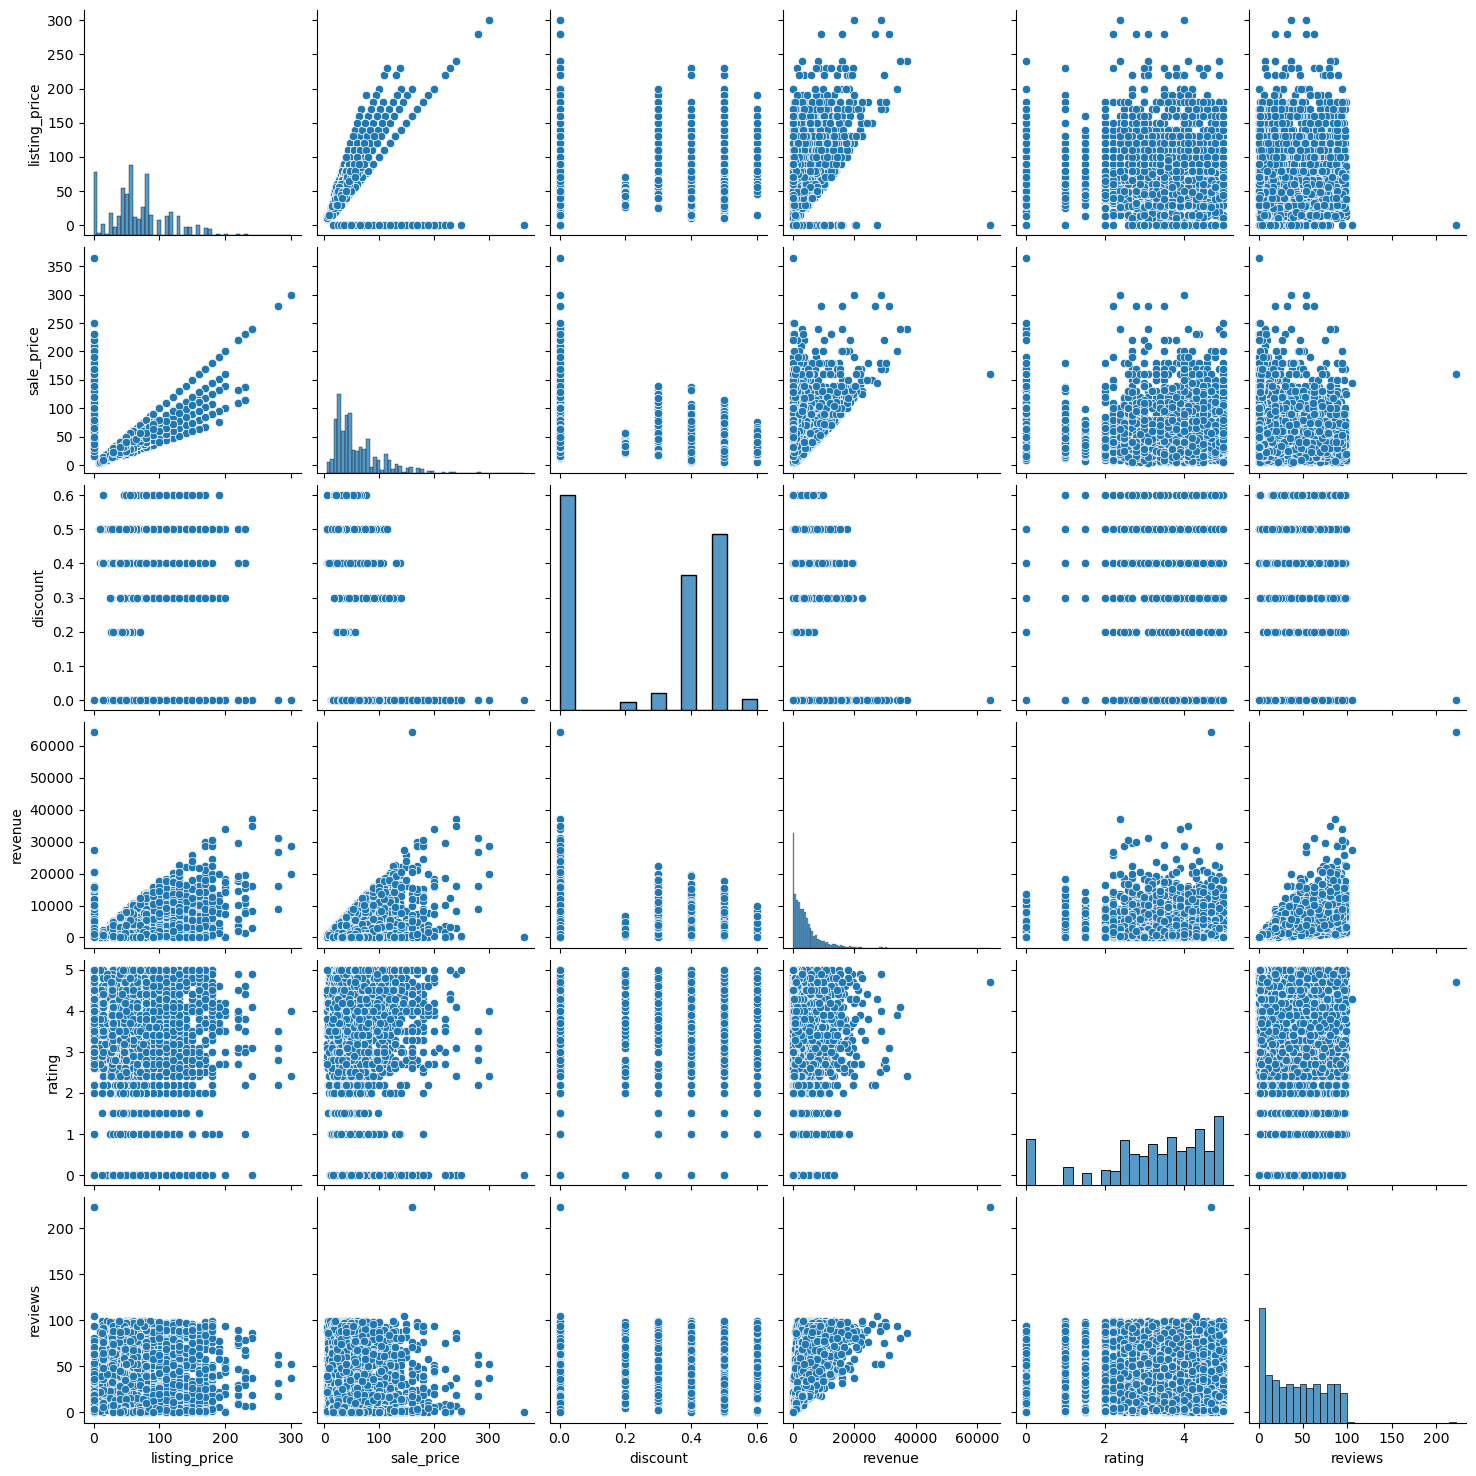

In [30]:
plt.figure(figsize=(30,20))
sns.pairplot(data=Sales_Data)
plt.show()

C:\Users\Maaz\AppData\Local\Temp\ipykernel_11452\2768913606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gph=sns.heatmap(Sales_Data.corr(),annot=True)


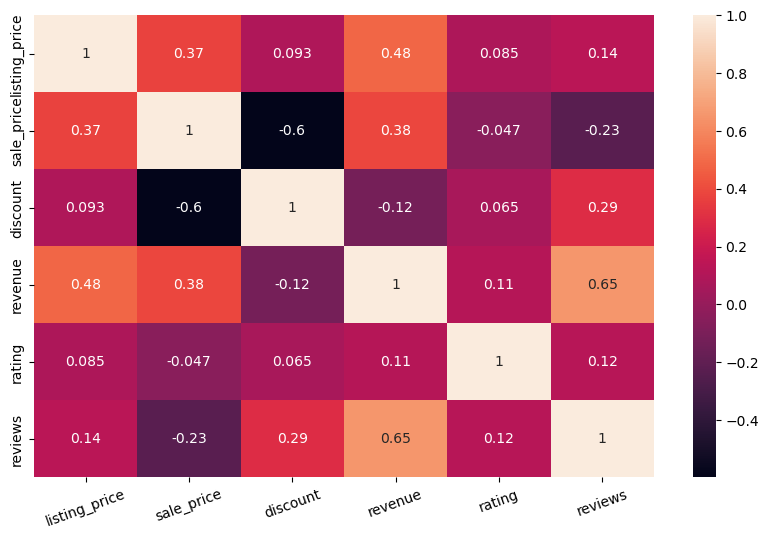

In [31]:
plt.figure(figsize=(10,6))
gph=sns.heatmap(Sales_Data.corr(),annot=True)
gph.set_xticklabels(gph.get_xticklabels(), rotation=20)
plt.show()

# What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite".

In [17]:
#100th percentile
hundredth= Sales_Data['listing_price'].quantile(1.0)
# 75th percentile
seventy_fifth = Sales_Data['listing_price'].quantile(0.75)
# 50th percentile
fifth = Sales_Data['listing_price'].quantile(0.5)
# 25th percentile
twenty_fifth = Sales_Data['listing_price'].quantile(0.25)


In [18]:
# Define the price ranges and corresponding labels
#np.inf: Represents positive infinity.
#-np.inf: Represents negative infinity.
price_ranges = [-np.inf, 0, twenty_fifth, fifth, seventy_fifth, hundredth]
price_labels = ['Zero Price', 'Budget', 'Average', 'Expensive', 'Elite']

# Apply pd.cut() to categorize products into price quartiles
Sales_Data['price_label'] = pd.cut(Sales_Data['listing_price'], bins=price_ranges, labels=price_labels)


In [19]:
Sales_Data[['listing_price','price_label']]

,listing_price,price_label
1,75.99,Expensive
2,9.99,Budget
3,69.99,Expensive
4,79.99,Expensive
5,47.99,Average
...,...,...
3174,0.00,Zero Price
3175,0.00,Zero Price
3176,159.95,Elite
3177,0.00,Zero Price


In [20]:
# Group by brand and price_label to get volume and mean revenue
adidas_vs_nike=Sales_Data.groupby(['brand','price_label'], as_index=True).agg({'price_label':'count','revenue':'mean'}).round(2)
adidas_vs_nike

price_label  revenue
brand  price_label                      
Adidas Zero Price             0      NaN
       Budget               574  2015.68
       Average              655  3035.30
       Expensive            759  4621.56
       Elite                587  8302.78
Nike   Zero Price           351  1621.94
       Budget                 6    97.99
       Average                8   675.59
       Expensive             47   500.56
       Elite                130  1367.45

# Do any differences exist between the word count of a product's description and its mean rating?

Split product description length into bins of 100 characters and calculate the average rating and number of reviews.

In [21]:
Sales_Data[['description','rating']]

,description,rating
1,"A modern take on adidas sport heritage, tailor...",3.3
2,These adidas Puka slippers for women's come wi...,2.6
3,"Inspired by modern tech runners, these women's...",4.1
4,This design is inspired by vintage Taekwondo s...,3.5
5,Refine your interval training in these women's...,1.0
...,...,...
3174,The Nike Tiempo Legend 8 Academy TF takes the ...,0.0
3175,The Nike React Metcon AMP takes the stability ...,3.0
3176,The Air Jordan 8 Retro recaptures the memorabl...,5.0
3177,The Nike Air Max 98 features the OG design lin...,4.0


In [30]:
Sales_Data['Desc_Length']= Sales_Data['description'].str.len()

In [34]:
Sales_Data['Desc_Length'].describe()

count    3117.000000
mean      265.553096
std        74.773811
min        14.000000
25%       215.000000
50%       258.000000
75%       302.000000
max       687.000000
Name: Desc_Length, dtype: float64

In [35]:
# min=14 max=687 therefore, create 7 bins of 100 characters each
lengthes = [0, 100, 200, 300, 400, 500, 600, 700]

# Description length labels
labels = ["100", "200", "300", "400", "500", "600", "700"]

# Cut into bins
Sales_Data['Desc_Length'] = pd.cut(Sales_Data['Desc_Length'], bins=lengthes, labels=labels)


In [38]:
Sales_Data['Desc_Length'].isnull().sum()

0

In [39]:
Sales_Data['Desc_Length'].value_counts()

300    1785
400     651
200     526
500     118
600      15
700      15
100       7
Name: Desc_Length, dtype: int64

In [44]:
# Group by the bins
description_lengths= Sales_Data.groupby('Desc_Length').agg(
    mean_rating=('rating', 'mean'), 
    num_reviews=('reviews', 'count')
).round(2)

print(description_lengths)

             mean_rating  num_reviews
Desc_Length                          
100                 2.26            7
200                 3.19          526
300                 3.28         1785
400                 3.29          651
500                 3.35          118
600                 3.12           15
700                 3.65           15


# How does the volume of products and median revenue vary between clothing and footwear?

Search "description" for "shoe*", "trainer*", or "foot*" and use the results to calculate the number of footwear products versus clothing products sold by the company and the median revenue for each of the two product types.

In [45]:
# List of footwear keywords
mylist = "shoe*|trainer*|foot*"

In [48]:
# Filter for footwear products
shoes = Sales_Data[Sales_Data["description"].str.contains(mylist)]

In [50]:
# Filter for clothing products
clothing = Sales_Data[~Sales_Data.isin(shoes["product_id"])]

In [51]:
# Remove null product_id values from clothing DataFrame
clothing.dropna(inplace=True)

In [52]:
# Create product_types DataFrame
product_types = pd.DataFrame({"num_clothing_products": len(clothing), 
                              "median_clothing_revenue": clothing["revenue"].median(), 
                              "num_footwear_products": len(shoes), 
                              "median_footwear_revenue": shoes["revenue"].median()}, 
                              index=[0])

print(product_types)

   num_clothing_products  median_clothing_revenue  num_footwear_products  \
0                    478                   625.07                   2639   

   median_footwear_revenue  
0                   3073.3  
